In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.random.seed(4)

In [18]:
#load data
data = pd.read_excel('Data\Molding_Data.xlsx') #using pandas to load the excel file
print(data.shape) #check the number of samples and number of variables
print(data.head(5))
print(np.any(data.isnull() == True))

data = data.dropna(axis=0, how='any') #drop nan from the data
print(data.shape)

(240, 10)
   No.  Part thickness     T_Mold      T_Melt     P_Gate   P_Runner  T_Barrel  \
0    1           3.155  40.648636  156.891489  25.036736  51.869155       190   
1    2           3.150  40.692273  157.556686  24.729291  51.463036       190   
2    3           3.154  40.769091  158.289622  24.455573  51.223509       190   
3    4           3.150  40.570000  158.003832  25.429318  52.304509       190   
4    5           3.149  40.651818  160.491065  24.135818  50.670800       190   

   T_Mold.1  P_Pack  Vel  
0        21      30   10  
1        21      30   10  
2        21      30   10  
3        21      30   10  
4        21      30   10  
True
True
(237, 10)


In [6]:
# prepare variables and target

X = data.loc[:,['T_Mold','T_Melt','P_Gate','P_Runner']] #Variables, or using data.iloc[:,2:6]
Y = data.loc[:,'Part thickness'] # Target

X = X.to_numpy() #convert data frame to numpy array
Y = Y.to_numpy()

print(X.shape, Y.shape)

(237, 4) (237,)


In [7]:
# data normalization 

#normalization to gaussian distribution
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler() # (x - u) / s
#X = sc.fit_transform(X)

#normalization to [0 1] range
for i in range(X.shape[1]):
    data_ = X[:,i]
    X[:,i] = (data_-np.amin(data_))/(np.amax(data_)-np.amin(data_)) *0.9 +0.05 

const = np.ones((len(X),1)) #this is to create a constant besides the variables

X = np.concatenate((X,const),axis = 1)

In [8]:
# split training and testing data

index = np.arange(len(Y))
np.random.shuffle(index) #disorder the original data

m = np.ceil(0.7*len(Y)) # 70% for training and 30% for testing
m = int(m) #covert float type to int type
X_Train = X[index[0:m],:] #get 70% data for training
Y_Train = Y[index[0:m]]

X_Test = X[index[m:],:] #remaining 30% data for training
Y_Test = Y[index[m:]]

print(X_Train.shape, Y_Train.shape)

(166, 5) (166,)


In [9]:
# define loss function, Mean Square Error (MSE)

def cost_function(X, Y, B):
    J = np.sum((X.dot(B)-Y)**2)/(2*len(Y)) 
    return J

In [10]:
# create iterative gradient descent training

def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = np.zeros(iterations)
    
    for iteration in range(iterations):
        loss = X.dot(B) - Y
        gradient = X.T.dot(loss)/len(Y)
        B = B - alpha * gradient
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost 
    
    return B, cost_history

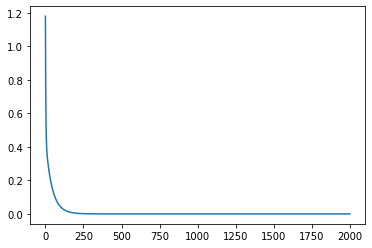

In [11]:
# training
B = np.random.random(X_Train.shape[1]) # Initial Coefficients
alpha = 0.1
iter_ = 2000
newB, cost_history = gradient_descent(X_Train, Y_Train, B, alpha, iter_)

plt.plot(np.arange(iter_), cost_history)

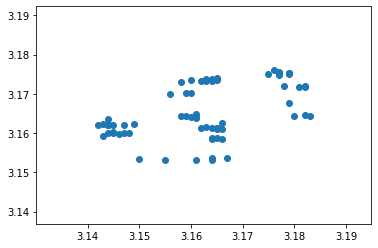

In [12]:
# testing 
y_predicted = X_Test.dot(newB)
plt.scatter(Y_Test, y_predicted)

In [13]:
# performance evaluation

def r2(y_predicted,y):
 sst = np.sum((y-y.mean())**2)
 ssr = np.sum((y_predicted-y)**2)
 r2 = 1-(ssr/sst)
 return(r2)

r2(y_predicted, Y_Test)

0.15647296646387254